In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from soccerplots.radar_chart import Radar

In [3]:
df=pd.read_csv("C:/Users/K Raghunandan/OneDrive/Desktop/Raghu/Kickoff/CSV Files/radars.csv")
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [4]:
df["Player"]=df["Player"].str.split("\\",expand=True)[0]
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [5]:
df=df[(df["Player"]=="Tammy Abraham") | (df["Player"]=="Timo Werner")].reset_index()
df.head()

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
1,481,482,Timo Werner,de GER,FW,Chelsea,24-361,1996,20.5,5,...,13.7,0,0,0,8.4,8.4,0.15,-3.4,-3.4,Matches


In [6]:
df=df.drop(["index","Rk","Nation","Pos","Squad","Age","Born","90s","FK","PK","PKatt","Matches"],axis=1)
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Tammy Abraham,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,5.6,5.6,0.18,0.4,0.4
1,Timo Werner,5,55,21,38.2,2.69,1.03,0.09,0.24,13.7,8.4,8.4,0.15,-3.4,-3.4


In [7]:
#Get Parameters
params=list(df.columns)
params=params[1:]

In [8]:
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [9]:
#Add ranges to list of tuple pairs
ranges=[]
a_values=[]
b_values=[]

for x in params:
    a=min(df[params][x])
    a=a-(a*.25)
    
    b=max(df[params][x])
    b=b+(b*.25)

    ranges.append((a,b))

for x in range(len(df["Player"])):
    if df["Player"][x]=="Tammy Abraham":
        a_values=df.iloc[x].values.tolist()
    if df["Player"][x]=="Timo Werner":
        b_values=df.iloc[x].values.tolist()

a_values=a_values[1:]
b_values=b_values[1:]
values=[a_values,b_values]

In [10]:
ranges

[(3.75, 7.5),
 (23.25, 68.75),
 (9.75, 26.25),
 (28.650000000000002, 52.375),
 (2.0175, 3.4125),
 (0.7725, 1.4375),
 (0.0675, 0.2375),
 (0.18, 0.5750000000000001),
 (7.425000000000001, 17.125),
 (4.199999999999999, 10.5),
 (4.199999999999999, 10.5),
 (0.11249999999999999, 0.22499999999999998),
 (-2.55, 0.5),
 (-2.55, 0.5)]

In [11]:
values

[[np.int64(6),
  np.int64(31),
  np.int64(13),
  np.float64(41.9),
  np.float64(2.73),
  np.float64(1.15),
  np.float64(0.19),
  np.float64(0.46),
  np.float64(9.9),
  np.float64(5.6),
  np.float64(5.6),
  np.float64(0.18),
  np.float64(0.4),
  np.float64(0.4)],
 [np.int64(5),
  np.int64(55),
  np.int64(21),
  np.float64(38.2),
  np.float64(2.69),
  np.float64(1.03),
  np.float64(0.09),
  np.float64(0.24),
  np.float64(13.7),
  np.float64(8.4),
  np.float64(8.4),
  np.float64(0.15),
  np.float64(-3.4),
  np.float64(-3.4)]]

In [12]:
title=dict(
    title_name="Tammy Abraham",
    title_color="red",
    subtitle_name="Chelsea",
    subtitle_color="red",
    title_name_2="Timo Werner",
    title_color_2="blue",
    subtitle_name_2="Chelsea",
    subtitle_color_2="blue",
    title_fontsize=18,
    subtitle_fontsize=15,
)

endnote="data via FBREF / Statsbomb"

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

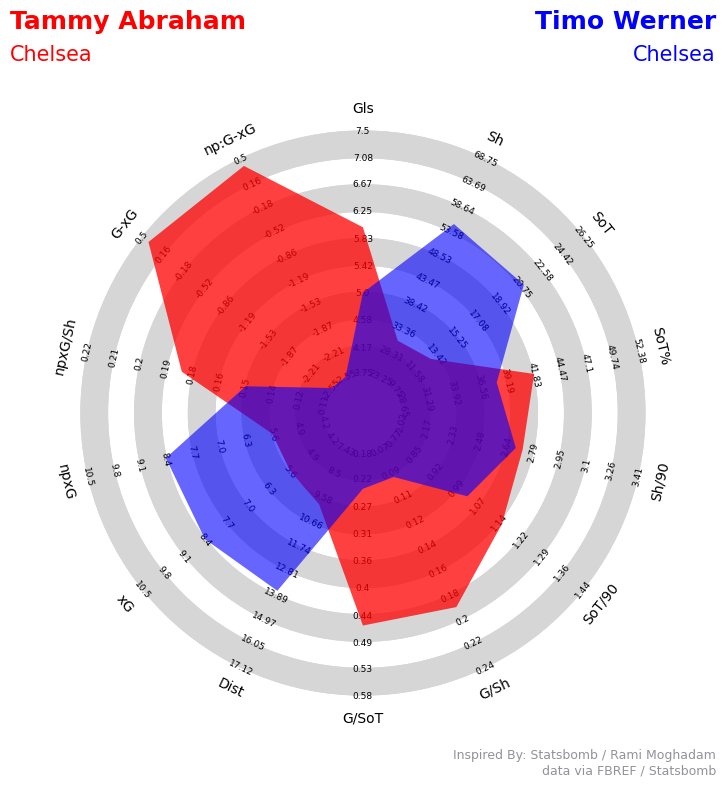

In [18]:
radar=Radar()
fig,ax=radar.plot_radar(ranges=ranges,params=params,values=values,radar_color=["red","blue"],alphas=[.75,.6],title=title,endnote=endnote,compare=True)
plt.savefig("C:/Users/K Raghunandan/OneDrive/Desktop/Raghu/Kickoff/CSV Files/Radar Chart.png")